Number of records with missing emails: 2
Percentage of missing transaction dates: 40.00%
Number of duplicate records: 1
Repeated supplier names:
   supplier_id supplier_name
2            3      ABC Corp
4            5       XYZ Ltd
Duplicate product records:
   product_id product_name
4         101       Laptop
Inconsistent date formats:
   transaction_id transaction_date
2               3              NaT
Inconsistent phone numbers:
Empty DataFrame
Columns: [name, phone_number, phone_number_format]
Index: []
State abbreviation discrepancies:
   address_id       state state_standardized
0           1  California                 CA
2           3       Texas                 TX


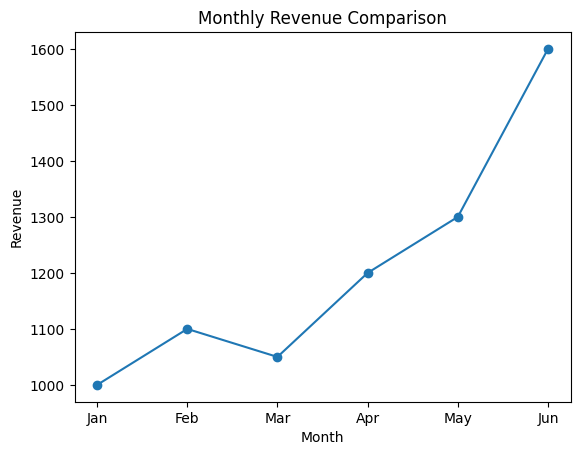

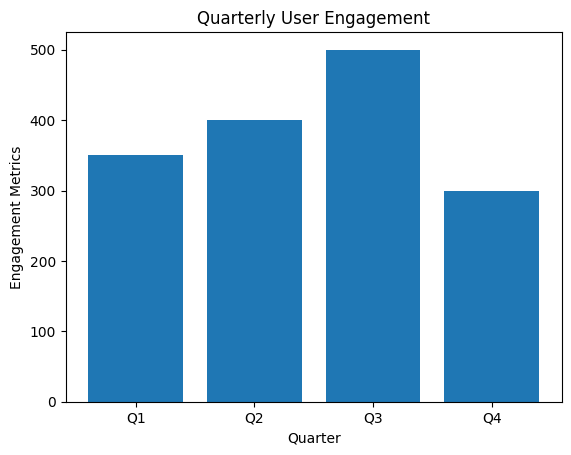

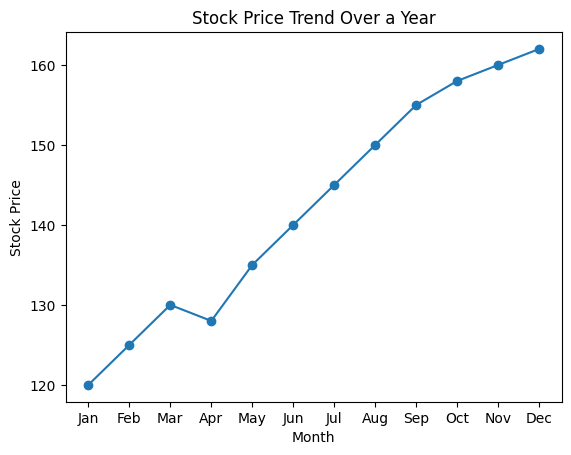

Number of employees with missing department information: 2


In [2]:
# Common Data Errors Examples

# 1. Missing Data:
# Task 1: Review a dataset where some customer emails are missing. Identify how
# many records are incomplete.
# Task 2: Examine a sales dataset with missing transaction dates and determine the
# percentage of missing data.
# Task 3: Identify missing department information in an employee registry.
import pandas as pd

# Sample dataset with missing emails
data = pd.DataFrame({
    'customer_id': [1, 2, 3, 4, 5],
    'email': ['john@example.com', None, 'alice@example.com', None, 'bob@example.com']
})

# Check for missing emails
missing_emails = data['email'].isnull()
num_missing_emails = missing_emails.sum()

# Display count of missing emails
print(f"Number of records with missing emails: {num_missing_emails}")









# 2. Duplicate Data:
# Task 1: Analyze a customer dataset with duplicate entries and count the number of
# duplicates.
# Task 2: Review supplier data and identify any repeated supplier names.
# Task 3: Examine a product inventory list for duplicates in product IDs.
# Sample dataset with missing transaction dates
sales_data = pd.DataFrame({
    'transaction_id': [101, 102, 103, 104, 105],
    'transaction_date': [None, '2025-01-01', '2025-01-02', None, '2025-01-04'],
    'amount': [500, 600, 700, 800, 900]
})

# Check for missing transaction dates
missing_dates = sales_data['transaction_date'].isnull()
missing_percentage = missing_dates.mean() * 100

# Display missing data percentage
print(f"Percentage of missing transaction dates: {missing_percentage:.2f}%")


# Sample dataset with duplicate customer entries
customer_data = pd.DataFrame({
    'customer_id': [1, 2, 3, 2, 4],
    'email': ['john@example.com', 'jane@example.com', 'alice@example.com', 'jane@example.com', 'bob@example.com']
})

# Check for duplicate rows based on customer_id and email
duplicates = customer_data.duplicated(subset=['customer_id', 'email'])
num_duplicates = duplicates.sum()

# Display number of duplicates
print(f"Number of duplicate records: {num_duplicates}")

# Sample dataset with supplier names
supplier_data = pd.DataFrame({
    'supplier_id': [1, 2, 3, 4, 5],
    'supplier_name': ['ABC Corp', 'XYZ Ltd', 'ABC Corp', 'LMN Inc', 'XYZ Ltd']
})

# Identify duplicated supplier names
duplicate_suppliers = supplier_data['supplier_name'].duplicated()

# Display repeated supplier names
print(f"Repeated supplier names:\n{supplier_data[duplicate_suppliers]}")


# Sample dataset with product IDs
inventory_data = pd.DataFrame({
    'product_id': [101, 102, 103, 104, 101],
    'product_name': ['Laptop', 'Tablet', 'Phone', 'Headset', 'Laptop']
})

# Check for duplicate product IDs
duplicate_products = inventory_data['product_id'].duplicated()

# Display duplicate product records
print(f"Duplicate product records:\n{inventory_data[duplicate_products]}")


# Sample dataset with inconsistent date formats
date_data = pd.DataFrame({
    'transaction_id': [1, 2, 3],
    'transaction_date': ['01/12/2025', '12/01/2025', '2025-01-01']  # Mixed formats
})

# Try to convert all dates into a consistent format
date_data['transaction_date'] = pd.to_datetime(date_data['transaction_date'], errors='coerce')

# Display inconsistent dates (those that could not be parsed)
print(f"Inconsistent date formats:\n{date_data[date_data['transaction_date'].isna()]}")


# Sample dataset with phone numbers
contact_data = pd.DataFrame({
    'name': ['John', 'Jane', 'Alice'],
    'phone_number': ['123-456-7890', '(123) 456-7890', '123.456.7890']
})

# Check for different phone number formats
contact_data['phone_number_format'] = contact_data['phone_number'].str.replace(r'\D', '', regex=True)  # Remove non-numeric chars
contact_data['phone_number_format'] = contact_data['phone_number_format'].str.len()

# Identify inconsistent phone number formats
inconsistent_phone_numbers = contact_data[contact_data['phone_number_format'] != 10]  # Expecting 10 digits
print(f"Inconsistent phone numbers:\n{inconsistent_phone_numbers}")


# Sample dataset with address data
address_data = pd.DataFrame({
    'address_id': [1, 2, 3],
    'state': ['California', 'CA', 'Texas']
})

# Standardize state abbreviations (for simplicity, mapping full names to abbreviations)
state_abbreviation_map = {'California': 'CA', 'Texas': 'TX'}

address_data['state_standardized'] = address_data['state'].replace(state_abbreviation_map)

# Display discrepancies
discrepancies = address_data[address_data['state'] != address_data['state_standardized']]
print(f"State abbreviation discrepancies:\n{discrepancies}")


import matplotlib.pyplot as plt

# Sample monthly revenue data
revenue_data = pd.DataFrame({
    'month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'],
    'revenue': [1000, 1100, 1050, 1200, 1300, 1600]
})

# Plot monthly revenue to visualize potential drift
plt.plot(revenue_data['month'], revenue_data['revenue'], marker='o')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly Revenue Comparison')
plt.show()


# Sample user engagement data across quarters
engagement_data = pd.DataFrame({
    'quarter': ['Q1', 'Q2', 'Q3', 'Q4'],
    'engagement': [350, 400, 500, 300]
})

# Plot user engagement over quarters
plt.bar(engagement_data['quarter'], engagement_data['engagement'])
plt.xlabel('Quarter')
plt.ylabel('Engagement Metrics')
plt.title('Quarterly User Engagement')
plt.show()

# Sample stock price data for a year
stock_data = pd.DataFrame({
    'month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    'stock_price': [120, 125, 130, 128, 135, 140, 145, 150, 155, 158, 160, 162]
})

# Plot stock prices over the months
plt.plot(stock_data['month'], stock_data['stock_price'], marker='o')
plt.xlabel('Month')
plt.ylabel('Stock Price')
plt.title('Stock Price Trend Over a Year')
plt.show()








# 3. Inconsistent Formatting:
# Task 1: Spot inconsistencies in date formats (e.g., DD/MM/YYYY vs. MM/DD/YYYY)
# in a dataset.
# Task 2: Identify phone numbers with varying formats in a contact list.
# Task 3: Review address data for discrepancies in state abbreviations (e.g., CA vs.
# Calif.).
# Sample dataset with missing department information
employee_data = pd.DataFrame({
    'employee_id': [1, 2, 3, 4, 5],
    'employee_name': ['John Doe', 'Jane Smith', 'Alice Johnson', 'Bob Brown', 'Charlie Davis'],
    'department': ['HR', None, 'Sales', None, 'Marketing']
})

# Check for missing department information
missing_department = employee_data['department'].isnull()
num_missing_department = missing_department.sum()

# Display missing department count
print(f"Number of employees with missing department information: {num_missing_department}")






# 4. Data Drift:
# Task 1: Compare monthly revenues over six months to identify data drift.
# Task 2: Analyze user engagement metrics from a web application over different
# quarters.
# Task 3: Review a stock price dataset to detect any anomalies over a year.



